In [ ]:
#import Library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
from pathlib import Path

In [ ]:
#import dataset
df_load = pd.read_csv('/content/drive/MyDrive/UJSP/WA_Fn-UseC_-Telco-Customer-Churn.csv')

#Tampilan bentuk dari dataset
print(df_load.shape)

#Tampilan 5 data teratas
print(df_load.head())

#Tampilan jumlah ID yang unik
print(df_load.customerID.nunique())

(7043, 21)
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Co

In [ ]:
#import matplotlib dan seaborn
import matplotlib.pyplot as plt
import seaborn as sns

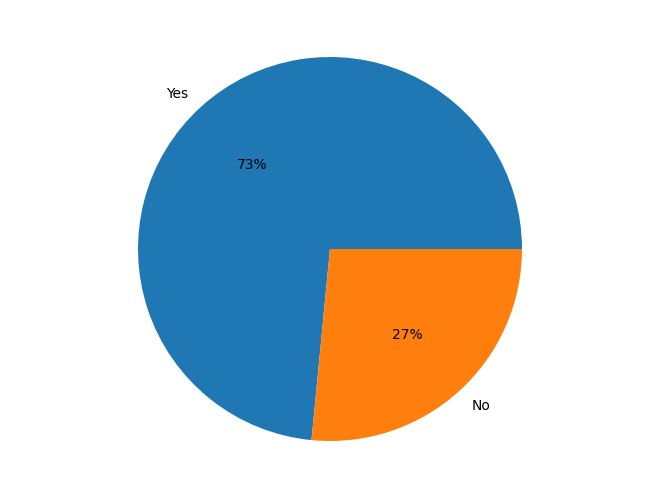

In [5]:
from matplotlib import pyplot as plt
import numpy as np
#your codes here
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
labels = ['Yes', 'No']
churn = df_load.Churn.value_counts()
ax.pie(churn, labels=labels, autopct='%.0f%%')
plt.show()

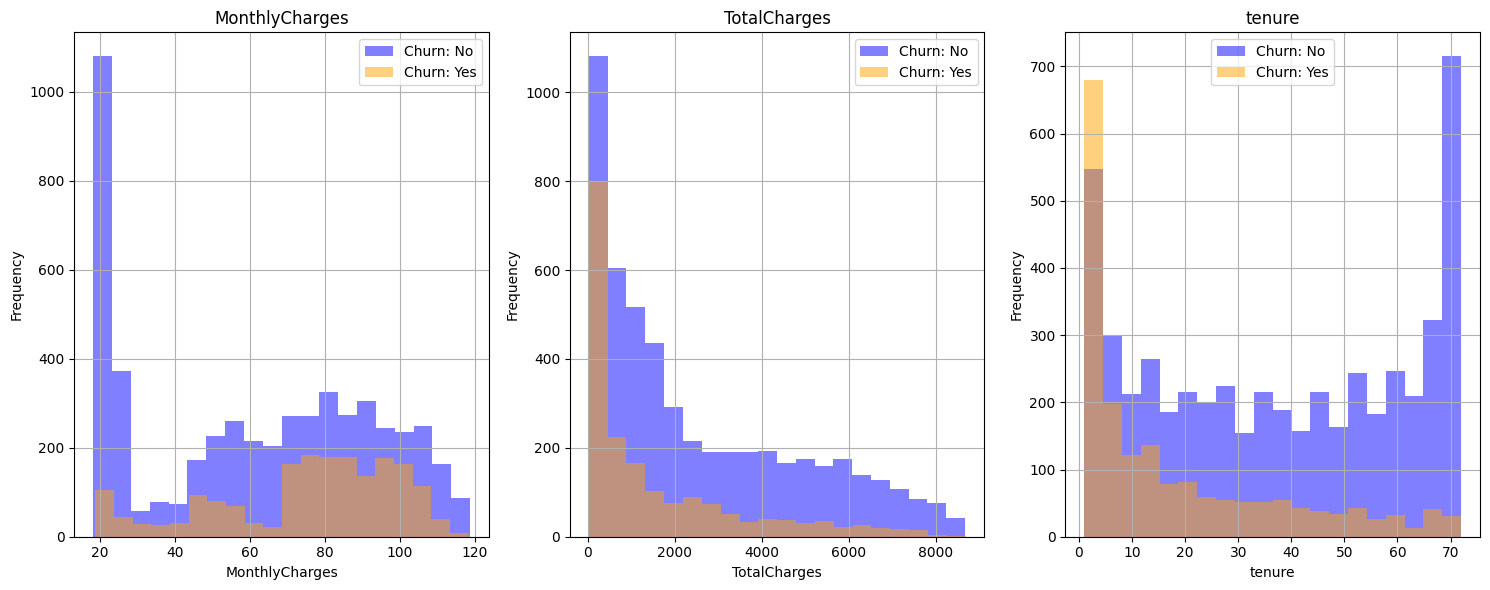

In [12]:
from matplotlib import pyplot as plt
import numpy as np

# Clean and convert 'TotalCharges' to numeric
df_load['TotalCharges'] = pd.to_numeric(df_load['TotalCharges'].str.strip(), errors='coerce')

# Drop NaN values in 'TotalCharges'
df_load.dropna(subset=['TotalCharges'], inplace=True)

# List of numerical features to plot
numerical_features = ['MonthlyCharges', 'TotalCharges', 'tenure']

# Create subplots
fig, ax = plt.subplots(1, 3, figsize=(15, 6))  # 1 row, 3 columns

# Iterate over features and subplots
for i, feature in enumerate(numerical_features):
    df_load[df_load.Churn == 'No'][feature].hist(bins=20, color='blue', alpha=0.5, ax=ax[i], label='Churn: No')
    df_load[df_load.Churn == 'Yes'][feature].hist(bins=20, color='orange', alpha=0.5, ax=ax[i], label='Churn: Yes')
    ax[i].set_title(feature)  # Set subplot title
    ax[i].set_xlabel(feature)  # Set x-axis label
    ax[i].set_ylabel('Frequency')  # Set y-axis label
    ax[i].legend()  # Add legend to each subplot

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

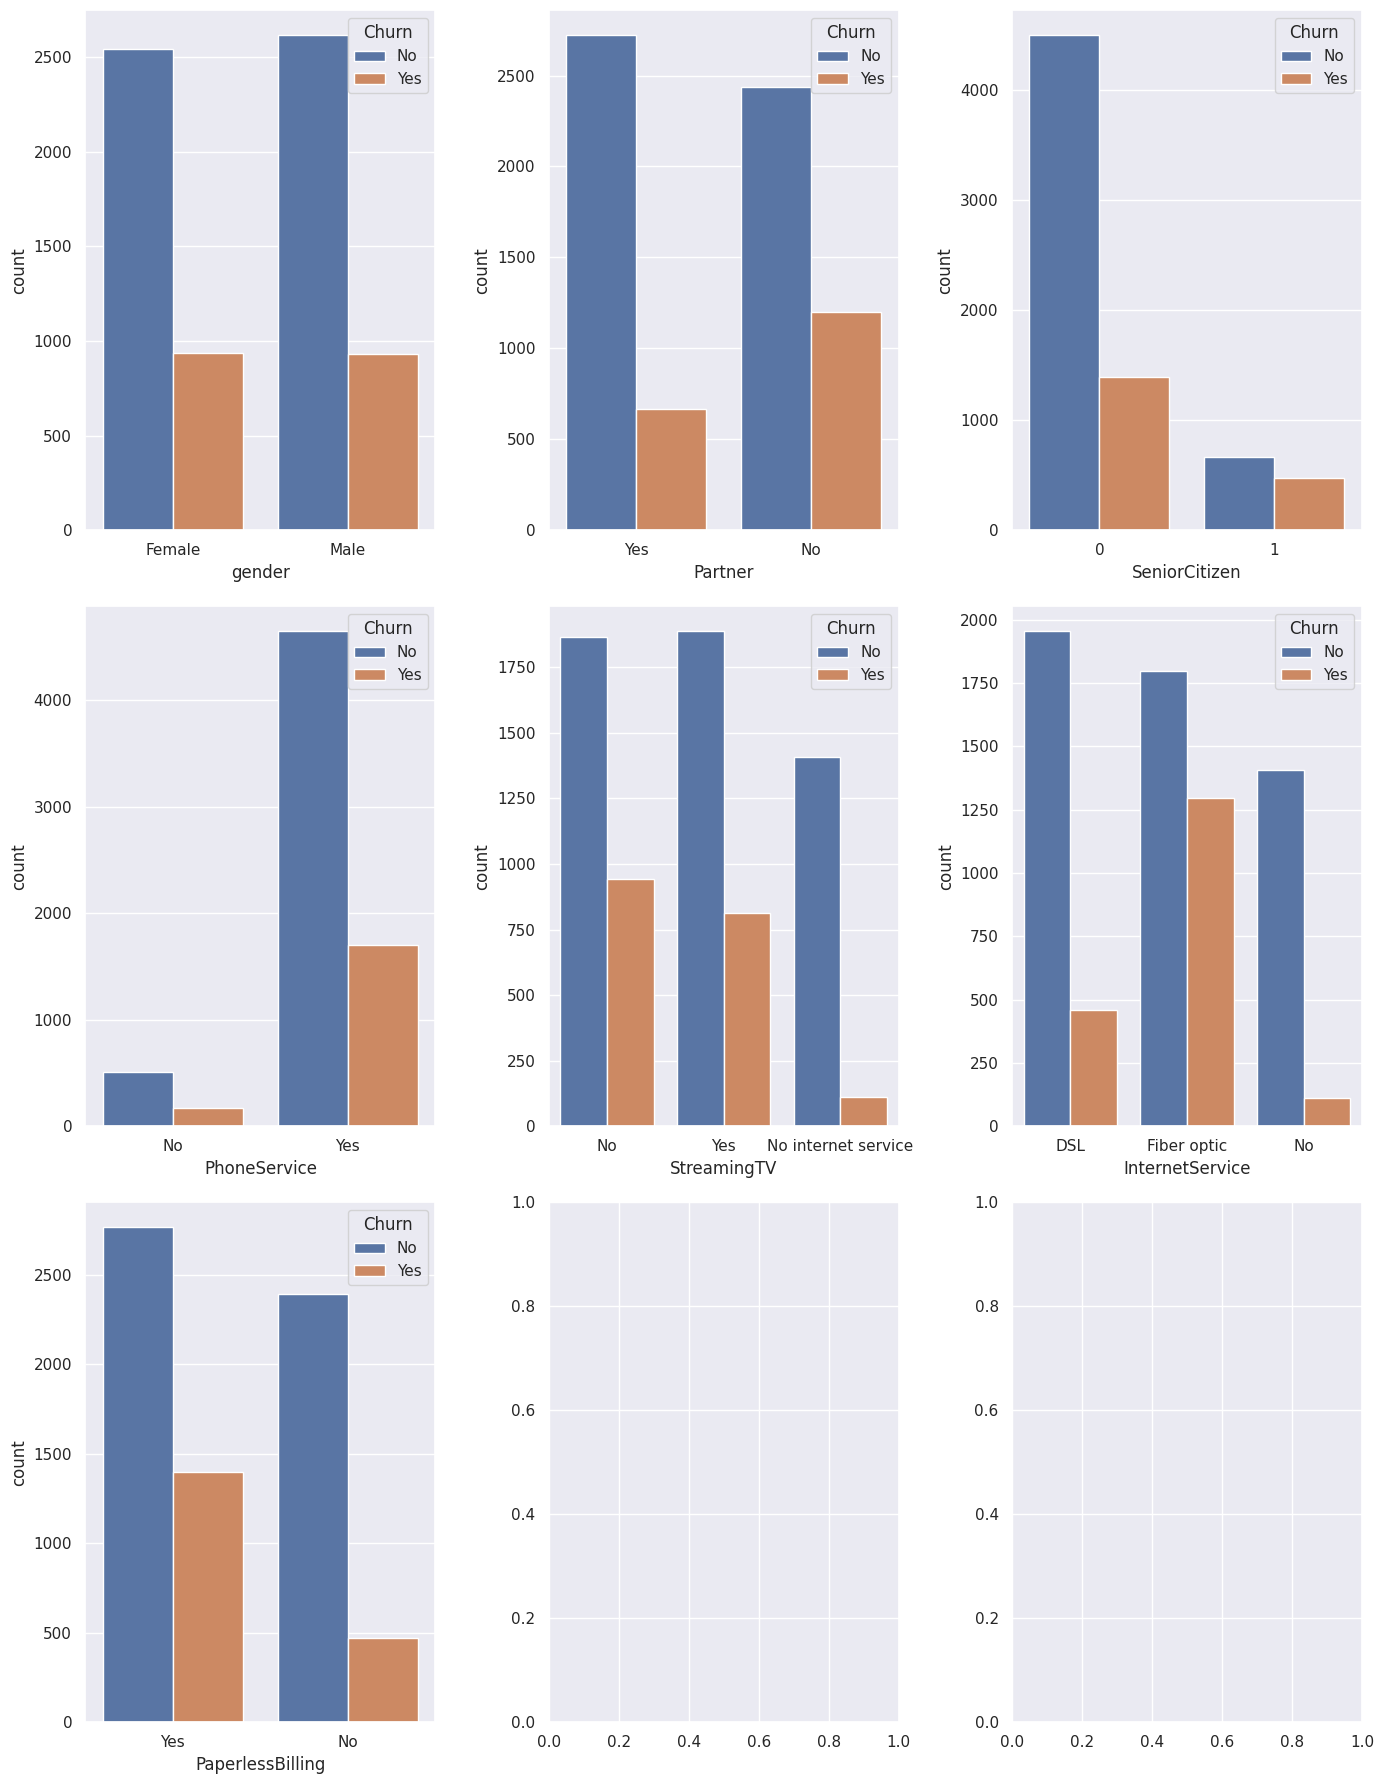

In [23]:
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

sns.set(style='darkgrid')

# Create a figure and axes with 3 rows and 3 columns
fig, ax = plt.subplots(3, 3, figsize=(14, 18))  # Adjusted figure size for better layout

# Access subplots using single indexing (ax[0], ax[1], ax[2])
sns.countplot(data=df_load, x='gender', hue='Churn', ax=ax[0, 0])
sns.countplot(data=df_load, x='Partner', hue='Churn', ax=ax[0, 1])
sns.countplot(data=df_load, x='SeniorCitizen', hue='Churn', ax=ax[0, 2])

# For the remaining plots, adjust the subplot indices accordingly
sns.countplot(data=df_load, x='PhoneService', hue='Churn', ax=ax[1, 0])
sns.countplot(data=df_load, x='StreamingTV', hue='Churn', ax=ax[1, 1])
sns.countplot(data=df_load, x='InternetService', hue='Churn', ax=ax[1, 2])

# Plotting PaperlessBilling on a new subplot
sns.countplot(data=df_load, x='PaperlessBilling', hue='Churn', ax=ax[2, 0])  # Adjust index as needed

plt.tight_layout()
plt.show()

In [33]:
print(df_load.columns)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [34]:
cleaned_df = df_load.drop(columns=["customerID", "UpdatedAt"], errors='ignore')
print(cleaned_df.head())

   gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No  

In [35]:
from sklearn.preprocessing import LabelEncoder
for column in cleaned_df.columns:
  if cleaned_df[column].dtype == np.number: continue
  cleaned_df[column] = LabelEncoder().fit_transform(cleaned_df[column])
print(cleaned_df.describe())

            gender  SeniorCitizen      Partner   Dependents       tenure  \
count  7032.000000    7032.000000  7032.000000  7032.000000  7032.000000   
mean      0.504693       0.162400     0.482509     0.298493    31.421786   
std       0.500014       0.368844     0.499729     0.457629    24.545260   
min       0.000000       0.000000     0.000000     0.000000     0.000000   
25%       0.000000       0.000000     0.000000     0.000000     8.000000   
50%       1.000000       0.000000     0.000000     0.000000    28.000000   
75%       1.000000       0.000000     1.000000     1.000000    54.000000   
max       1.000000       1.000000     1.000000     1.000000    71.000000   

       PhoneService  MultipleLines  InternetService  OnlineSecurity  \
count   7032.000000    7032.000000      7032.000000     7032.000000   
mean       0.903299       0.940557         0.872582        0.789249   
std        0.295571       0.948627         0.737271        0.859962   
min        0.000000       0.000

<ipython-input-35-0f70eee4b99e>:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if cleaned_df[column].dtype == np.number: continue
<ipython-input-35-0f70eee4b99e>:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if cleaned_df[column].dtype == np.number: continue
<ipython-input-35-0f70eee4b99e>:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if cleaned_df[column].dtype == np.number: continue
<ipython-input-35-0f70eee4b99e>:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if cleaned_df[column].dtype == np.number: continue
<ipython-input-35-0f70eee4b99e>:3: DeprecationWa

In [37]:
from sklearn.model_selection import train_test_split
X = cleaned_df.drop('Churn', axis=1)
y = cleaned_df["Churn"]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # Changed x_tarin to x_train
print('Jumlah baris dan kolom dari x_train adalah:', x_train.shape,', sedangkan Jumlah baris dan kolom dari y_train adalah:', y_train.shape)
print('Prosentase Churn di data Training adalah:')
print(y_train.value_counts(normalize=True))
print('Jumlah baris dan kolom dari x_test adalah:', x_test.shape,', sedangkan Jumlah baris dan kolom dari y_test adalah:', y_test.shape)
print('Prosentase Churn di data Testing adalah:')
print(y_test.value_counts(normalize=True))

Jumlah baris dan kolom dari x_train adalah: (4922, 19) , sedangkan Jumlah baris dan kolom dari y_train adalah: (4922,)
Prosentase Churn di data Training adalah:
Churn
0    0.734254
1    0.265746
Name: proportion, dtype: float64
Jumlah baris dan kolom dari x_test adalah: (2110, 19) , sedangkan Jumlah baris dan kolom dari y_test adalah: (2110,)
Prosentase Churn di data Testing adalah:
Churn
0    0.734123
1    0.265877
Name: proportion, dtype: float64


In [40]:
# Performansi Model Training - Menampilkan Metrics

from sklearn.metrics import classification_report, confusion_matrix

# Make predictions on the training set
y_train_pred = log_model.predict(x_train)

# Classification report
print("Classification Report Training Model (Logistic Regression):\n")
print(classification_report(y_train, y_train_pred))

# Confusion matrix
print("Confusion Matrix Training Model (Logistic Regression):\n")
print(confusion_matrix(y_train, y_train_pred))

Classification Report Training Model (Logistic Regression):

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      3614
           1       0.66      0.56      0.60      1308

    accuracy                           0.81      4922
   macro avg       0.75      0.73      0.74      4922
weighted avg       0.80      0.81      0.80      4922

Confusion Matrix Training Model (Logistic Regression):

[[3231  383]
 [ 576  732]]
